# NBA Game Prediction - Data Preparation

This notebook focuses on preparing our data for machine learning model development. We'll:
1. Load the transformed data
2. Define our target variable
3. Select relevant features
4. Split the data into training and testing sets

## 1. Import Libraries
Import all necessary libraries for data preparation and machine learning.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set()
sns.set_palette('husl')

## 2. Load Transformed Data
Load the final processed data from the transformation step.

In [6]:
# Load the transformed data
df = pd.read_csv('../data/transformed/transformed_games.csv')
print(f'Loaded {len(df)} games')
df.head()

Loaded 2391 games


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,PREV_GAME_DATE,REST_DAYS,IS_BACK_TO_BACK,WIN,WIN_STREAK
0,-0.996243,-1.675621,ATL,Atlanta Hawks,-1.008425,2022-10-21,ATL vs. ORL,W,-0.171063,-0.465567,-0.351448,0.214460,-0.536683,0.190511,-0.513480,0.750987,-0.465217,-0.981348,1.623350,-0.351579,0.889349,0.529245,0.060599,0.994165,-1.158262,1.072969,0.716713,0.738993,2022-10-19,0.0,False,1.016446,-1.438207
1,-0.996243,-1.675621,ATL,Atlanta Hawks,-1.008065,2022-10-23,ATL vs. CHA,L,-0.171063,-0.375190,-0.560793,1.167275,-1.281698,-1.209341,0.130322,-1.641262,1.038953,0.894274,0.376457,1.591099,-0.712032,0.362610,-0.561259,0.265009,1.933084,-0.275149,0.466835,-1.211057,2022-10-21,0.0,False,-0.983820,-1.438207
2,-0.996243,-1.675621,ATL,Atlanta Hawks,-1.007425,2022-10-28,ATL @ DET,W,1.079739,2.064982,2.788732,1.484880,1.776784,-0.089459,-0.835382,0.688033,-0.653238,-0.668744,-0.081803,-0.074053,0.489004,0.362610,1.097030,-0.828725,1.491463,-1.892891,1.716223,1.750130,2022-10-26,0.0,False,1.016446,-1.370682
3,-0.996243,-1.675621,ATL,Atlanta Hawks,-1.005845,2022-11-07,ATL vs. MIL,W,2.330541,0.347824,0.904624,1.802485,-0.222993,-0.369430,-0.835382,0.247355,-0.653238,-0.825046,0.408428,0.480997,0.689176,0.862515,-0.561259,1.358743,-0.716641,-0.275149,-0.282797,1.389010,2022-11-05,0.0,False,1.016446,-1.269394
4,-0.996243,-1.675621,ATL,Atlanta Hawks,-1.005065,2022-11-12,ATL @ PHI,L,-1.421865,-0.375190,-0.351448,0.214460,-0.536683,-1.769282,-1.640135,-1.376856,1.038953,0.737972,0.706830,0.480997,-0.311687,0.029341,-1.183118,-1.193303,-1.158262,1.342592,-0.032920,-0.849936,2022-11-10,0.0,False,-0.983820,-1.235632


## 3. Define Target Variable
Create our target variable (game outcome: win/loss).

In [7]:
# Create target variable (1 for win, 0 for loss)
df['TARGET'] = (df['WL'] == 'W').astype(int)

# Display target distribution
print('Target variable distribution:')
print(df['TARGET'].value_counts(normalize=True))


Target variable distribution:
TARGET
0    0.508156
1    0.491844
Name: proportion, dtype: float64


## 4. Feature Selection
Select relevant features for prediction. We'll focus on:
- Team performance metrics
- Game statistics
- Rest and schedule information

In [8]:
# Define feature columns based on available data
feature_columns = [
    'PTS',           # Points scored
    'FGM',           # Field goals made
    'FGA',           # Field goals attempted
    'FG_PCT',        # Field goal percentage
    'FG3M',          # Three-pointers made
    'FG3A',          # Three-pointers attempted
    'FG3_PCT',       # Three-point percentage
    'FTM',           # Free throws made
    'FTA',           # Free throws attempted
    'FT_PCT',        # Free throw percentage
    'OREB',          # Offensive rebounds
    'DREB',          # Defensive rebounds
    'REB',           # Total rebounds
    'AST',           # Assists
    'STL',           # Steals
    'BLK',           # Blocks
    'TOV',           # Turnovers
    'PF',            # Personal fouls
    'REST_DAYS',     # Days of rest
    'WIN_STREAK'     # Current win streak
]

# Create feature matrix X and target vector y
X = df[feature_columns]
y = df['TARGET']

print('Feature matrix shape:', X.shape)
print('\nFeature columns:')
print(X.columns.tolist())

Feature matrix shape: (2391, 20)

Feature columns:
['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'REST_DAYS', 'WIN_STREAK']


## 5. Split Data into Training and Testing Sets
Split the data into training (80%) and testing (20%) sets.

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

# Save the prepared data
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print('\nPrepared data saved to ../data/processed/')

Training set shape: (1912, 20)
Testing set shape: (479, 20)

Prepared data saved to ../data/processed/


## 6. Feature Analysis
Analyze the relationship between features and the target variable.

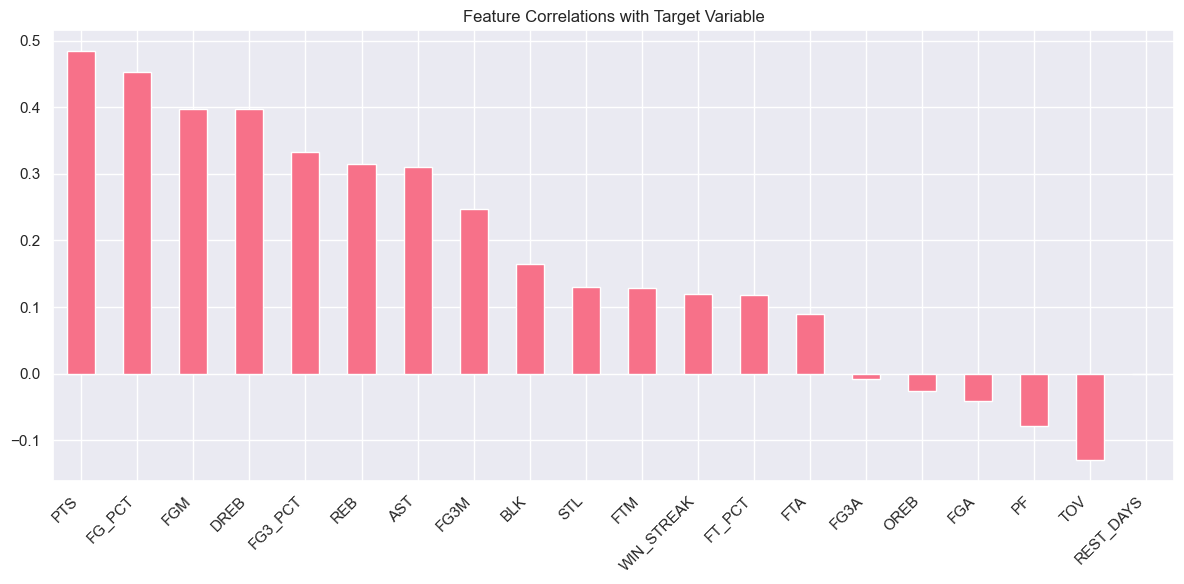

In [10]:
# Calculate correlation with target
correlations = X_train.corrwith(y_train).sort_values(ascending=False)

# Plot feature correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()